In [2]:
from google.colab import files
uploaded = files.upload()

Saving DOGE-USD.csv to DOGE-USD.csv


In [3]:
!pip install fbprophet

In [4]:
import pandas as pd
from fbprophet import Prophet

In [5]:
df = pd.read_csv('DOGE-USD.csv')
df = df[["Date", "Close"]]
df.columns = ["ds", "y"]
print(df)

             ds         y
0    2020-09-23  0.002564
1    2020-09-24  0.002644
2    2020-09-25  0.002706
3    2020-09-26  0.002708
4    2020-09-27  0.002701
..          ...       ...
361  2021-09-19  0.233142
362  2021-09-20  0.207071
363  2021-09-21  0.201027
364  2021-09-22  0.224858
365  2021-09-23  0.220233

[366 rows x 2 columns]


In [6]:
prophet = Prophet()
prophet.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
future = prophet.make_future_dataframe(periods=365)
print(future)

            ds
0   2020-09-23
1   2020-09-24
2   2020-09-25
3   2020-09-26
4   2020-09-27
..         ...
726 2022-09-19
727 2022-09-20
728 2022-09-21
729 2022-09-22
730 2022-09-23

[731 rows x 1 columns]


In [8]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(200)

,ds,yhat,yhat_lower,yhat_upper
531,2022-03-08,0.104005,-0.081186,0.284916
532,2022-03-09,0.105139,-0.080324,0.290621
533,2022-03-10,0.104268,-0.092683,0.291706
534,2022-03-11,0.109141,-0.073320,0.299341
535,2022-03-12,0.106353,-0.083184,0.299253
...,...,...,...,...
726,2022-09-19,-0.038565,-0.536892,0.527923
727,2022-09-20,-0.040594,-0.546320,0.491598
728,2022-09-21,-0.039460,-0.561387,0.514354
729,2022-09-22,-0.040332,-0.546239,0.516093


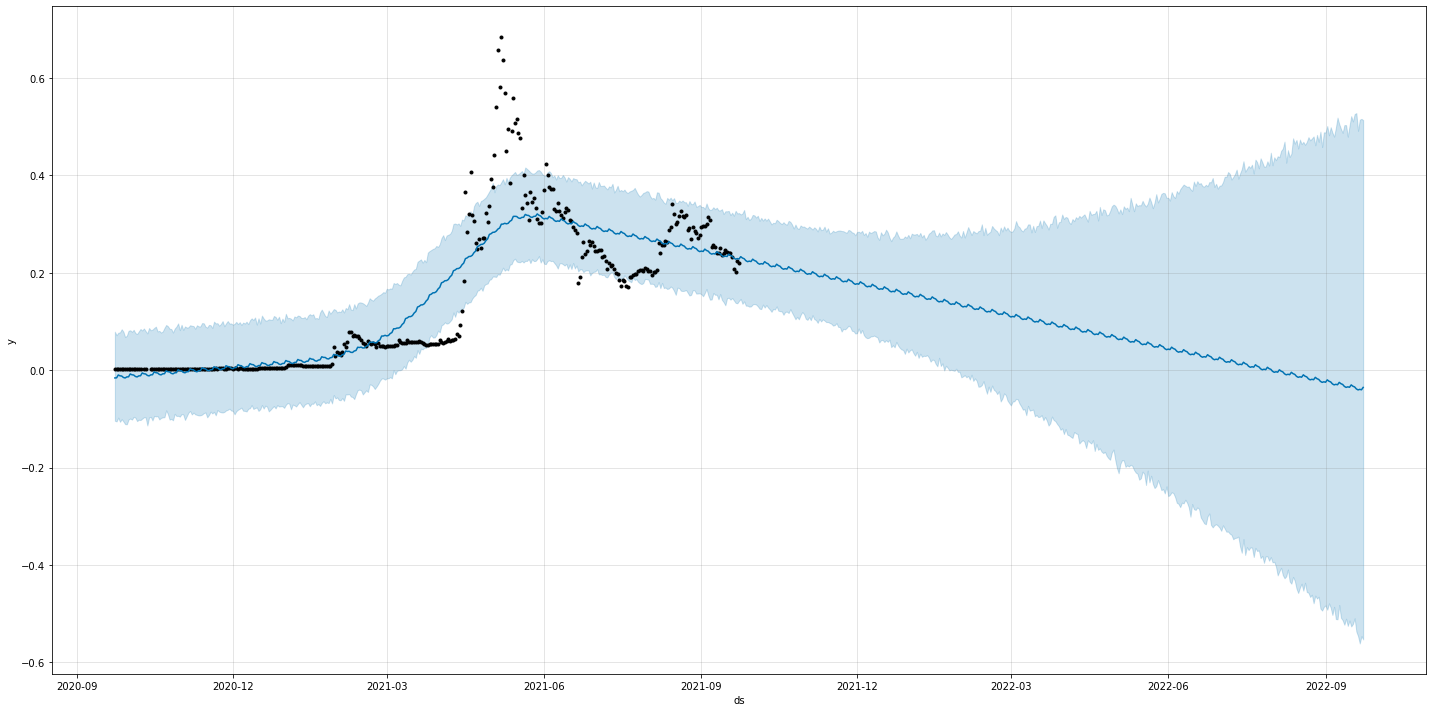

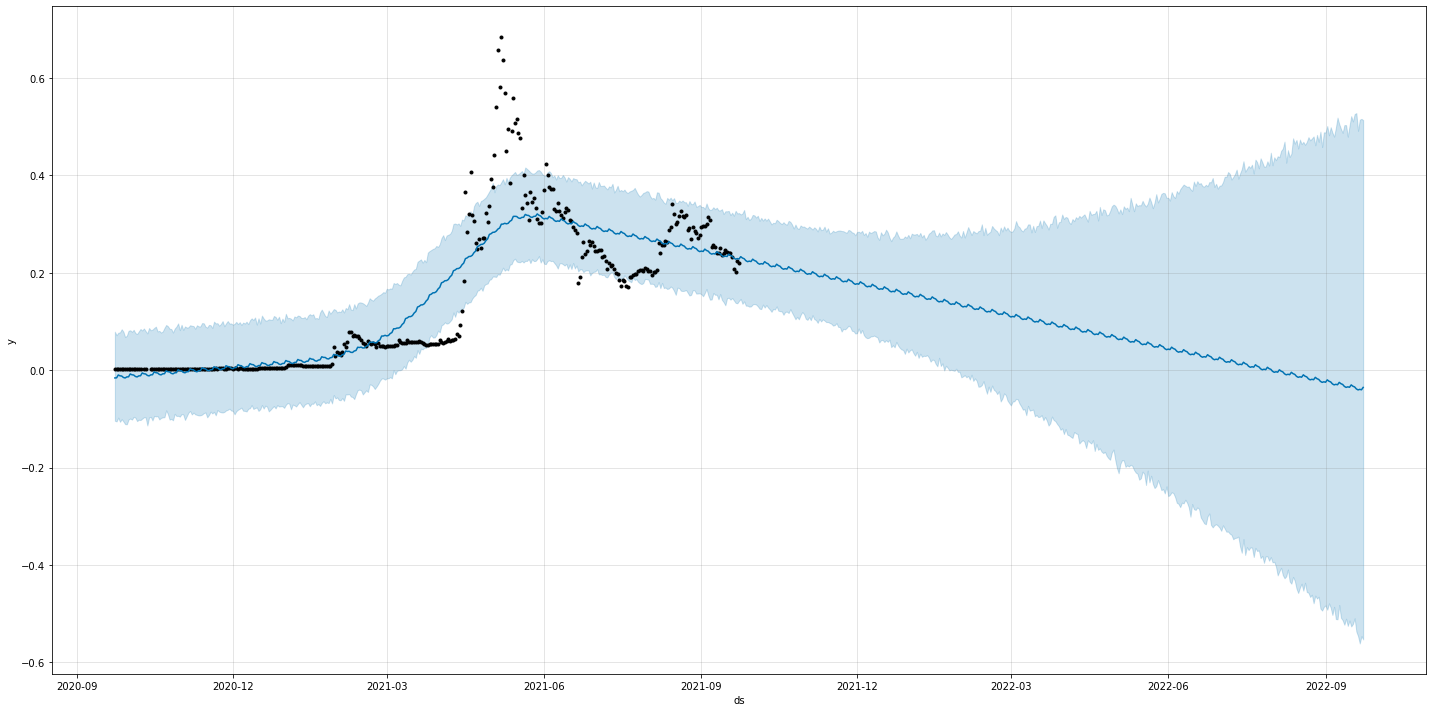

In [9]:
from fbprophet.plot import plot
prophet.plot(forecast, figsize=(20, 10))